In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as skl
import seaborn as sns

In [2]:
%cd /home/stepan/kaggle/cars_from_auction

/home/stepan/kaggle/cars_from_auction


In [3]:
%ls

data/  prepare/  review/


In [4]:
%ls data/

processed/  sample_submission.csv  test_no_target.csv  train.csv  zipcodes.csv


# General review

In [5]:
data = pd.read_csv("data/train.csv", index_col=0)

In [6]:
data.sample(5)

,engine_capacity,type,registration_year,gearbox,power,model,mileage,fuel,brand,damage,zipcode,insurance_price,price
27747,NaN,limousine,1,manual,82,a_klasse,125000,gasoline,mercedes_benz,0.0,35236,NaN,900
25103,NaN,limousine,2006,auto,235,s_klasse,150000,diesel,mercedes_benz,0.0,31319,1030.0,20475
43124,NaN,bus,2000,manual,102,transporter,150000,diesel,volkswagen,0.0,37249,140.0,2275
92289,NaN,convertible,2001,auto,197,slk,100000,gasoline,mercedes_benz,0.0,47877,330.0,6051
55434,1.8,station wagon,2009,manual,160,a3,150000,gasoline,audi,0.0,24109,900.0,11820


In [7]:
data.describe()

,engine_capacity,registration_year,power,mileage,damage,zipcode,insurance_price,price
count,19950.000000,50000.000000,50000.000000,50000.000000,41734.000000,50000.000000,42669.000000,50000.000000
mean,1.867213,1839.195200,121.105060,125206.200000,0.096157,51436.403920,421.345239,5746.904380
std,0.808440,545.974243,188.787938,39587.836838,0.294809,25808.985658,679.444359,7688.683102
min,0.000000,0.000000,0.000000,5000.000000,0.000000,1067.000000,10.000000,455.000000
25%,1.400000,1998.000000,75.000000,100000.000000,0.000000,30989.000000,100.000000,1365.000000
50%,1.800000,2003.000000,110.000000,150000.000000,0.000000,50374.000000,230.000000,3185.000000
75%,2.000000,2008.000000,150.000000,150000.000000,0.000000,72415.000000,510.000000,7270.000000
max,9.500000,2016.000000,16311.000000,150000.000000,1.000000,99998.000000,38960.000000,163800.000000


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50000 entries, 48298 to 25524
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   engine_capacity    19950 non-null  float64
 1   type               43746 non-null  object 
 2   registration_year  50000 non-null  int64  
 3   gearbox            47959 non-null  object 
 4   power              50000 non-null  int64  
 5   model              47743 non-null  object 
 6   mileage            50000 non-null  int64  
 7   fuel               46417 non-null  object 
 8   brand              50000 non-null  object 
 9   damage             41734 non-null  float64
 10  zipcode            50000 non-null  int64  
 11  insurance_price    42669 non-null  float64
 12  price              50000 non-null  int64  
dtypes: float64(3), int64(5), object(5)
memory usage: 5.3+ MB


## Visualize

In [9]:
default_figsize = (16, 12)
plt.rcParams.update({'font.size': 18})

<AxesSubplot:>

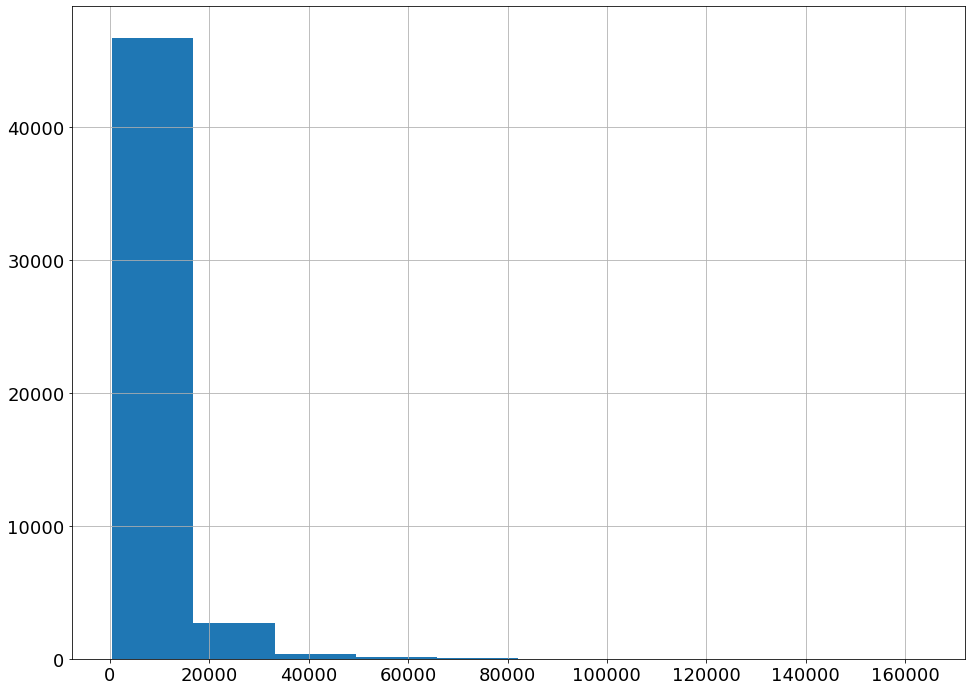

In [10]:
data['price'].hist(figsize=default_figsize)

<AxesSubplot:>

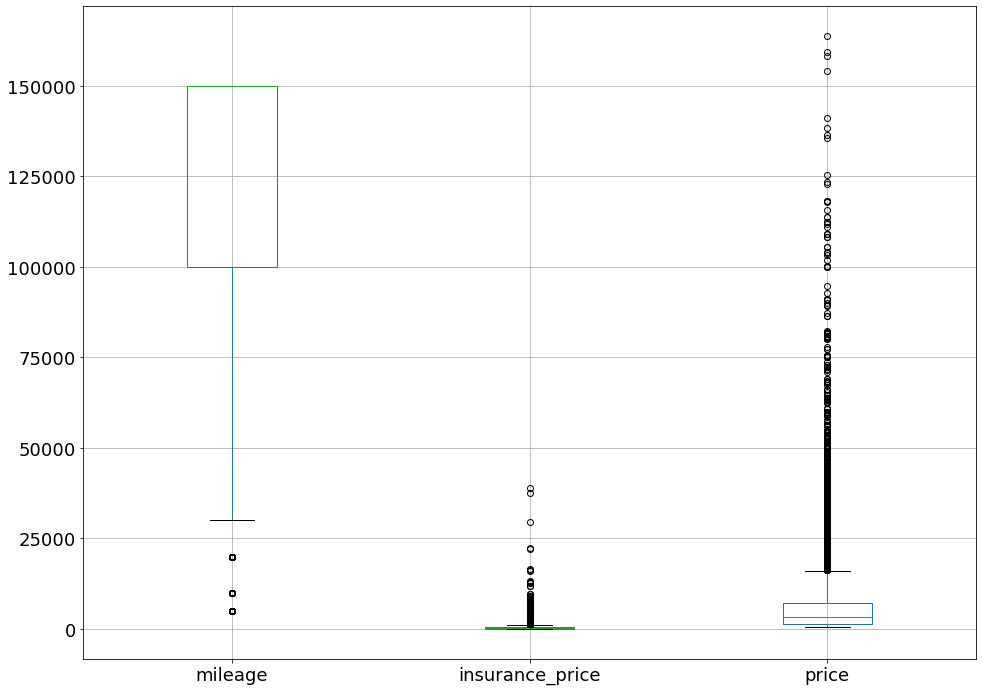

In [11]:
data.boxplot(figsize=default_figsize, column=['mileage', 'insurance_price', 'price'])

<AxesSubplot:>

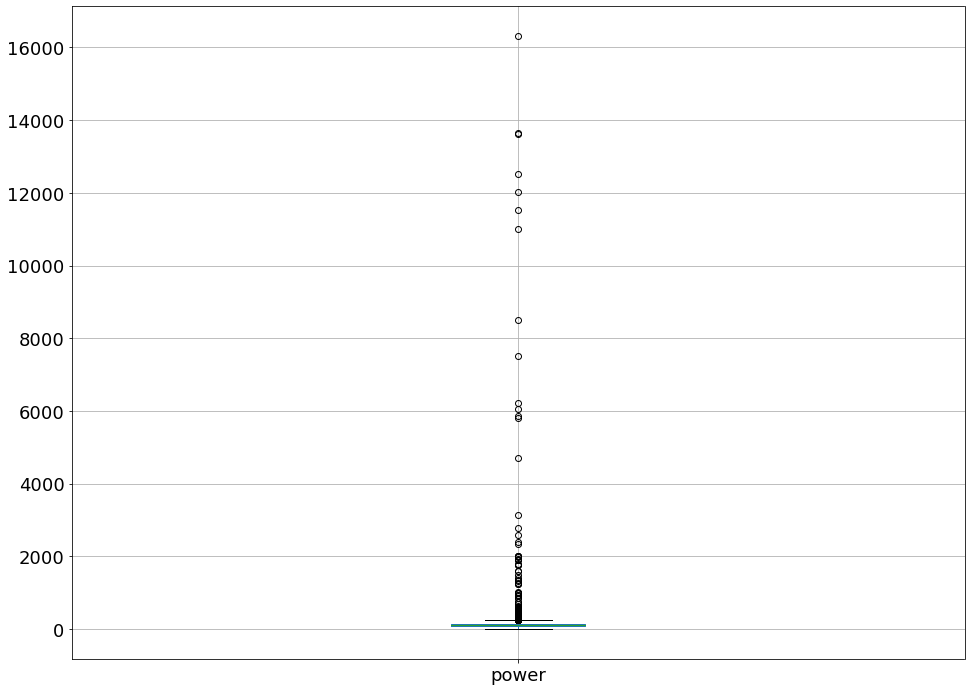

In [12]:
data.boxplot(figsize=default_figsize, column=['power'])

<AxesSubplot:>

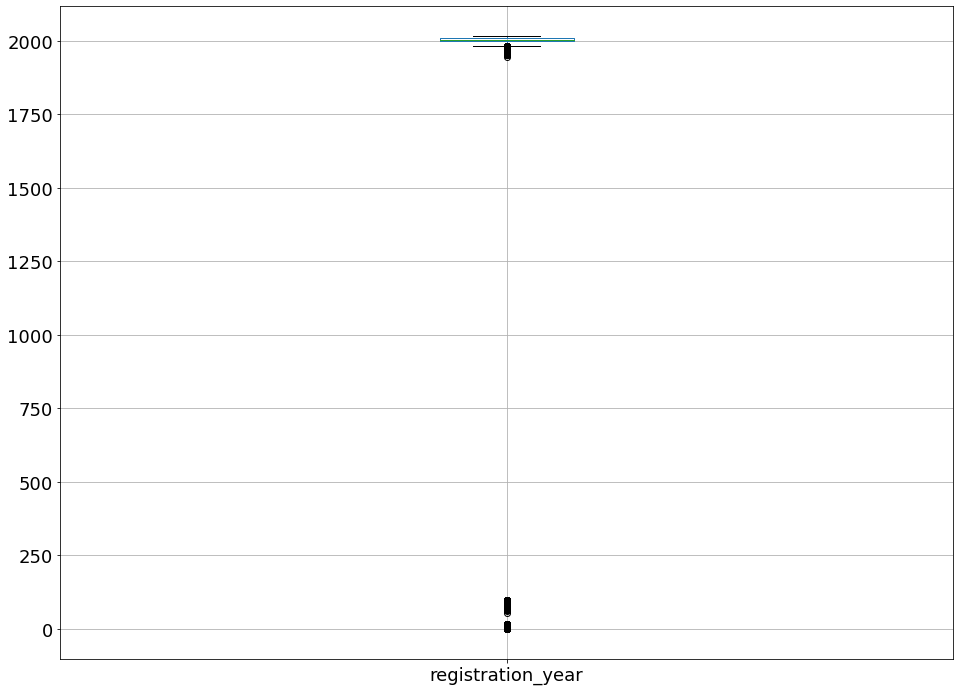

In [13]:
data.boxplot(figsize=default_figsize, column=['registration_year'])

<AxesSubplot:>

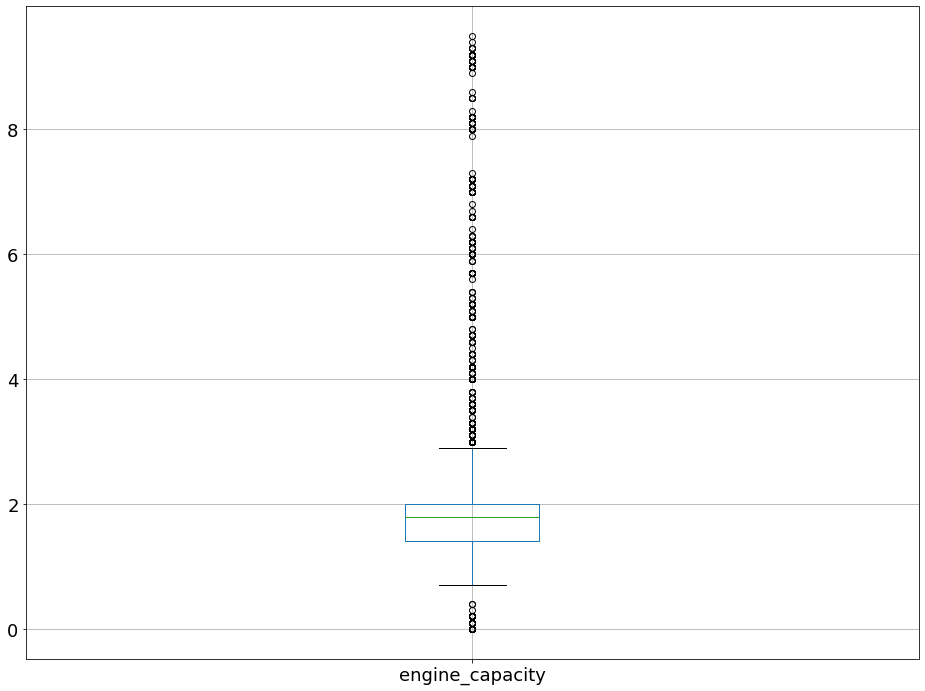

In [14]:
data.boxplot(figsize=default_figsize, column=['engine_capacity'])

<AxesSubplot:ylabel='damage'>

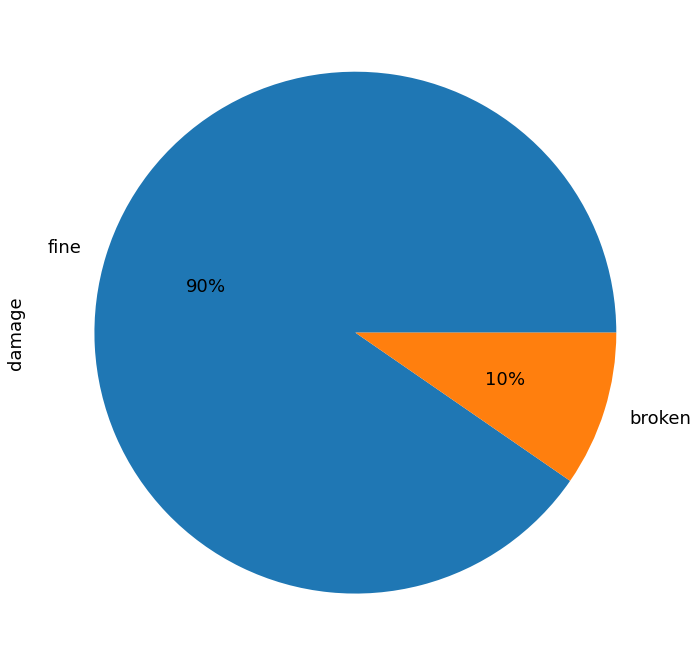

In [15]:
data['damage'].value_counts().plot.pie(figsize=default_figsize, labels=['fine', 'broken'], autopct='%1.0f%%')

<AxesSubplot:ylabel='gearbox'>

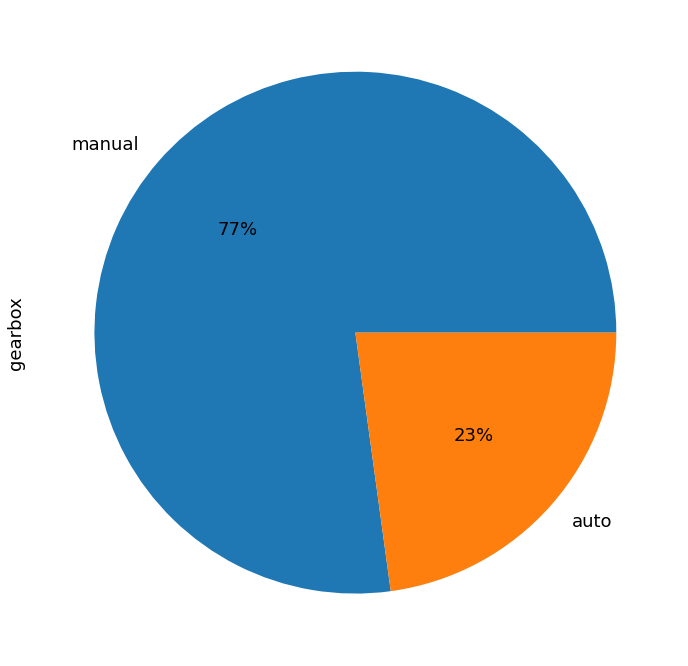

In [16]:
data['gearbox'].value_counts().plot.pie(figsize=default_figsize, autopct='%1.0f%%')

<AxesSubplot:ylabel='type'>

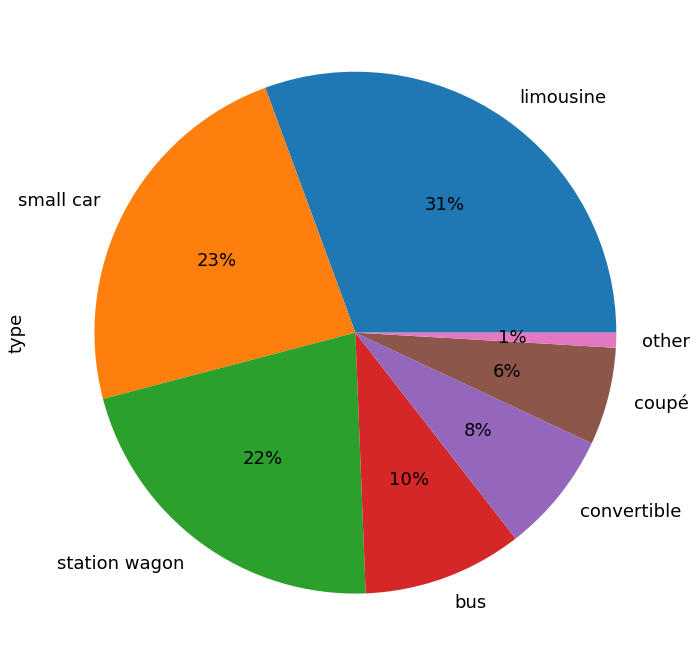

In [17]:
data['type'].value_counts().plot.pie(figsize=default_figsize, autopct='%1.0f%%')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39]),
 [Text(0, 0, 'citroen'),
  Text(1, 0, 'mercedes_benz'),
  Text(2, 0, 'ford'),
  Text(3, 0, 'peugeot'),
  Text(4, 0, 'audi'),
  Text(5, 0, 'renault'),
  Text(6, 0, 'volkswagen'),
  Text(7, 0, 'nissan'),
  Text(8, 0, 'opel'),
  Text(9, 0, 'seat'),
  Text(10, 0, 'bmw'),
  Text(11, 0, 'suzuki'),
  Text(12, 0, 'skoda'),
  Text(13, 0, 'fiat'),
  Text(14, 0, 'mitsubishi'),
  Text(15, 0, 'kia'),
  Text(16, 0, 'sonstige_autos'),
  Text(17, 0, 'mazda'),
  Text(18, 0, 'porsche'),
  Text(19, 0, 'mini'),
  Text(20, 0, 'smart'),
  Text(21, 0, 'toyota'),
  Text(22, 0, 'jeep'),
  Text(23, 0, 'hyundai'),
  Text(24, 0, 'daewoo'),
  Text(25, 0, 'honda'),
  Text(26, 0, 'alfa_romeo'),
  Text(27, 0, 'saab'),
  Text(28, 0, 'volvo'),
  Text(29, 0, 'chevrolet'),
  Text(30, 0, 'chrysler'),
  Text(31, 0, 'daihatsu'),
  Text(32, 0

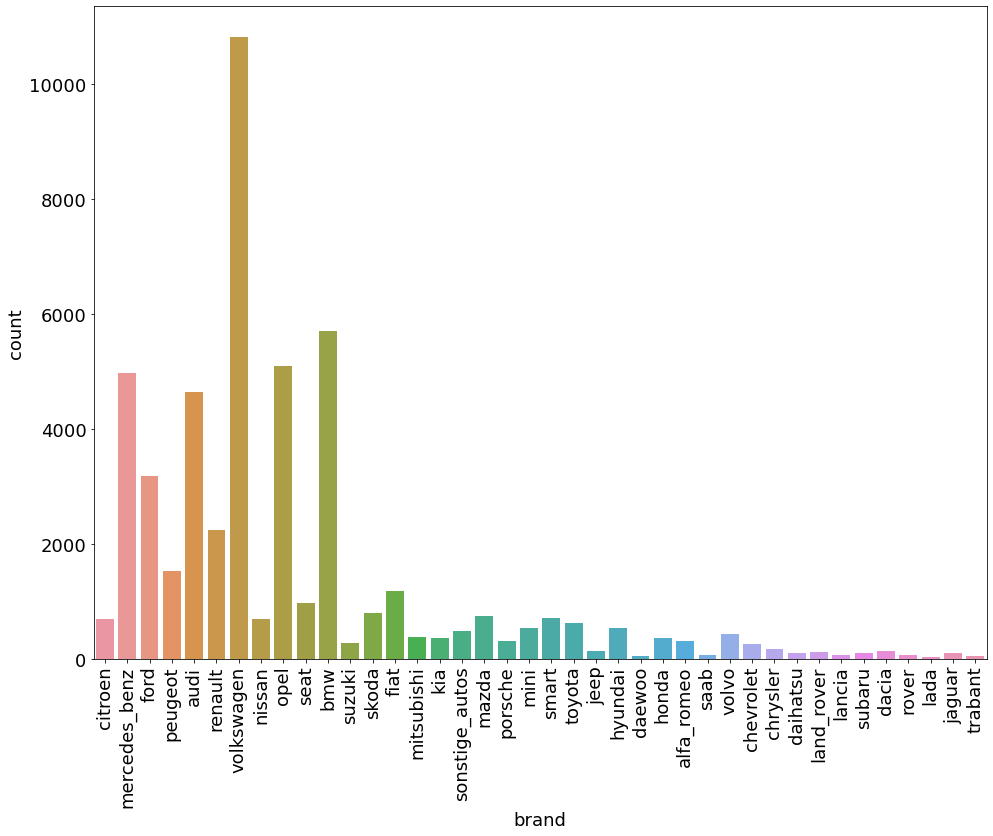

In [32]:
plt.figure(figsize=default_figsize)
sns.countplot(data['brand'])
plt.xticks(rotation=90)

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173, 174, 175, 176, 177

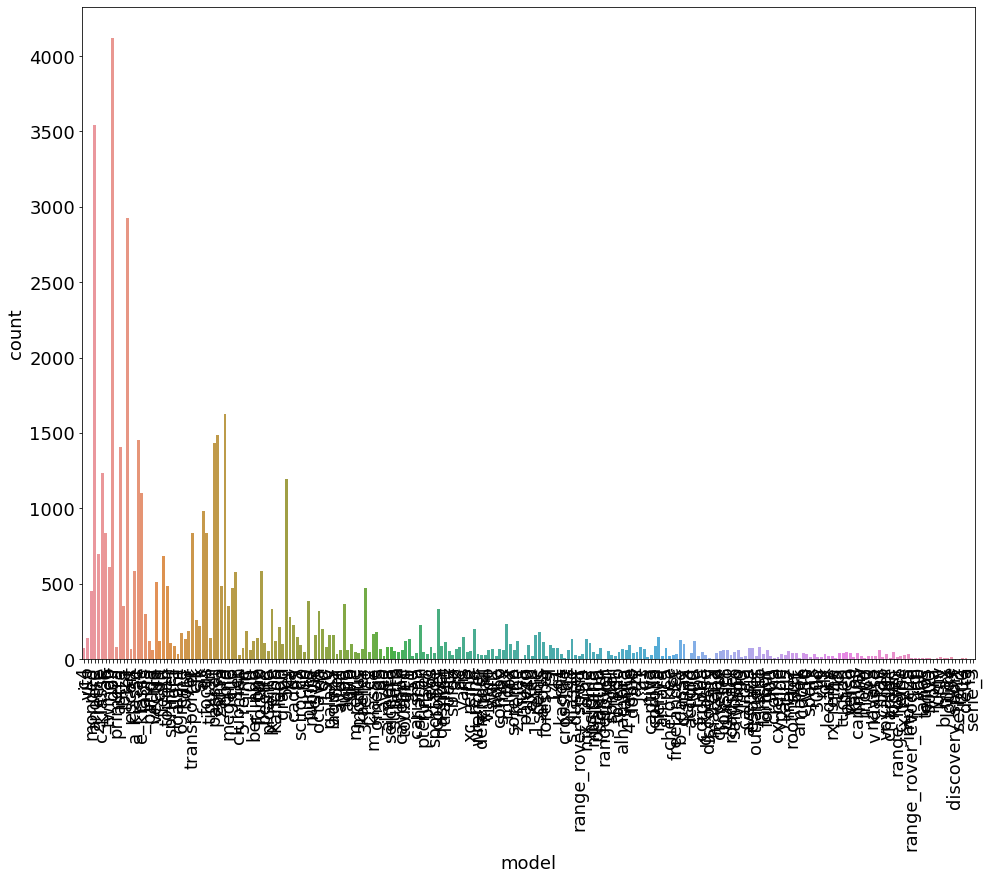

In [33]:
plt.figure(figsize=default_figsize)
sns.countplot(data['model'])
plt.xticks(rotation=90)

In [19]:
def is_high(row):
    clone = row.copy()
    clone[row.abs() > 0.3] = '#ff937d'
    clone[row.abs() > 0.5] = '#f56942'
    clone[row.abs() > 0.6] = '#ff795e'
    clone[(row.abs() <= 0.3) | (row.abs() == 1.0)] = ''
    return [f'background-color: {cell}' for cell in clone]

In [20]:
data.corr().style.apply(is_high)

,engine_capacity,registration_year,power,mileage,damage,zipcode,insurance_price,price
engine_capacity,1.000000,0.002631,0.232026,0.120936,0.021945,-0.014678,0.196703,0.187968
registration_year,0.002631,1.000000,-0.007621,-0.005873,-0.004730,0.003301,0.114942,0.000184
power,0.232026,-0.007621,1.000000,-0.006022,-0.025703,0.018866,0.162632,0.192052
mileage,0.120936,-0.005873,-0.006022,1.000000,0.088003,-0.037736,-0.312705,-0.422695
damage,0.021945,-0.004730,-0.025703,0.088003,1.000000,-0.005210,-0.070000,-0.148380
zipcode,-0.014678,0.003301,0.018866,-0.037736,-0.005210,1.000000,0.061259,0.075321
insurance_price,0.196703,0.114942,0.162632,-0.312705,-0.070000,0.061259,1.000000,0.838729
price,0.187968,0.000184,0.192052,-0.422695,-0.148380,0.075321,0.838729,1.000000


### Statistics

In [21]:
data['engine_capacity'].mean(), data['engine_capacity'].median()

(1.8672130325814538, 1.8)

In [22]:
data['power'].mean(), data['power'].median()

(121.10506, 110.0)

In [23]:
data['insurance_price'].mean(), data['insurance_price'].median()

(421.3452389322459, 230.0)

### Empty data

In [24]:
data[data['power'] == 0.0].head()

,engine_capacity,type,registration_year,gearbox,power,model,mileage,fuel,brand,damage,zipcode,insurance_price,price
81047,NaN,NaN,2016,NaN,0,vito,150000,NaN,mercedes_benz,NaN,45896,NaN,2457
51492,NaN,limousine,2000,manual,0,a_klasse,125000,gasoline,mercedes_benz,0.0,47877,70.0,1314
17234,1.6,NaN,2016,manual,0,2_reihe,150000,gasoline,peugeot,NaN,45883,NaN,500
88976,NaN,limousine,2002,manual,0,andere,125000,gasoline,kia,NaN,26789,110.0,1456
50554,NaN,limousine,2003,NaN,0,3er,150000,diesel,bmw,0.0,65479,160.0,2093


In [25]:
len(data[data['power'] == 0.0])

4294

In [26]:
data[data['engine_capacity'] == 0.0].head()

,engine_capacity,type,registration_year,gearbox,power,model,mileage,fuel,brand,damage,zipcode,insurance_price,price
77959,0.0,station wagon,1994,manual,115,passat,150000,gasoline,volkswagen,0.0,31224,60.0,909
98661,0.0,limousine,2009,auto,408,7er,150000,gasoline,bmw,0.0,14612,1580.0,21385
4250,0.0,limousine,1998,auto,101,3_reihe,100000,gasoline,peugeot,0.0,56410,30.0,910
22626,0.0,NaN,16,manual,55,NaN,100000,NaN,hyundai,0.0,24147,NaN,1046
82352,0.0,limousine,2005,auto,150,3er,125000,gasoline,bmw,0.0,13439,400.0,5642


In [27]:
len(data[data['engine_capacity'] == 0.0])

34

In [28]:
data[data['insurance_price'] == 0.0]

,engine_capacity,type,registration_year,gearbox,power,model,mileage,fuel,brand,damage,zipcode,insurance_price,price


In [29]:
len(data[data['insurance_price'] == 0.0])

0

In [35]:
data[data['mileage'] == 0]

,engine_capacity,type,registration_year,gearbox,power,model,mileage,fuel,brand,damage,zipcode,insurance_price,price


### Review model

In [34]:
data['model'].value_counts()

golf               4121
andere             3541
3er                2927
polo               1627
corsa              1486
                   ... 
serie_3               1
discovery_sport       1
rangerover            1
serie_2               1
i3                    1
Name: model, Length: 247, dtype: int64